In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [19]:
data = pd.read_csv("diabetes[1].csv")

DATA CLEANING AND UNDERSTANDING

In [20]:
print("🔹 Shape of the dataset:", data.shape)
print("\n🔹 Columns:\n", data.columns)
print("\n🔹 Data Types:\n", data.dtypes)
print("\n🔹 First 5 rows:\n", data.head())

🔹 Shape of the dataset: (768, 9)

🔹 Columns:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

🔹 Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

🔹 First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      16

In [21]:
print("\n🔹 Missing Values per Column:\n", data.isnull().sum())


🔹 Missing Values per Column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [22]:
print("\n🔹 Descriptive Statistics:\n", data.describe())


🔹 Descriptive Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min    

In [23]:
print("\n🔹 Number of Duplicate Rows:", data.duplicated().sum())


🔹 Number of Duplicate Rows: 0


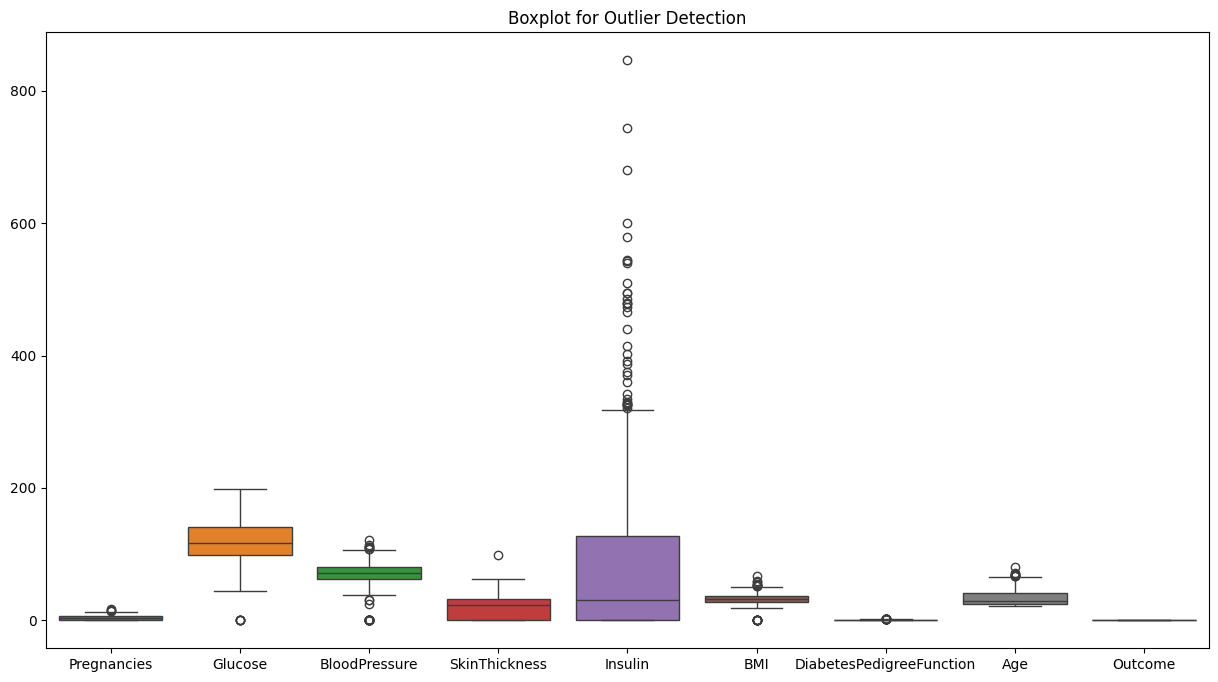

In [50]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.show()

Simple Linear Regression

In [36]:
data = pd.read_csv("diabetes[1].csv")
data['Age'] = data['Age'].replace(0, data['Age'].mean())


In [37]:
X = data[['Age']]
y = data['Glucose']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 953.4242781436858
R² Score: 0.0525531542583737


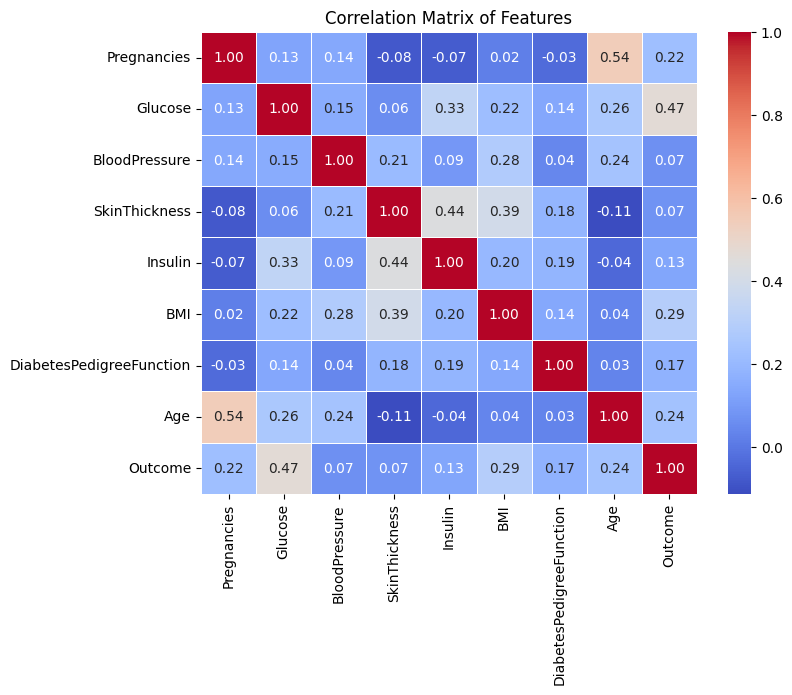

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set the figure size to make it small
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

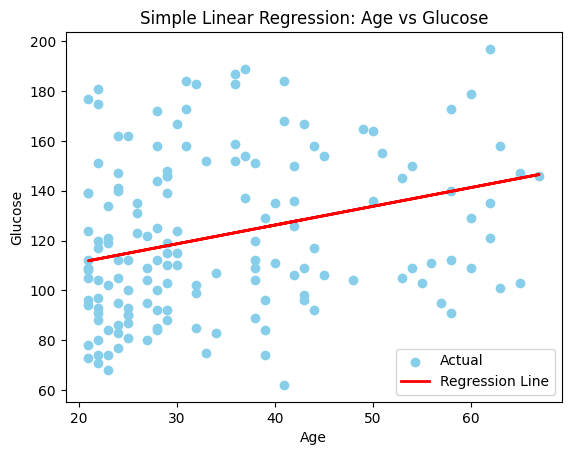

In [41]:
plt.scatter(X_test, y_test, color='skyblue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.title("Simple Linear Regression: Age vs Glucose")
plt.legend()
plt.show()


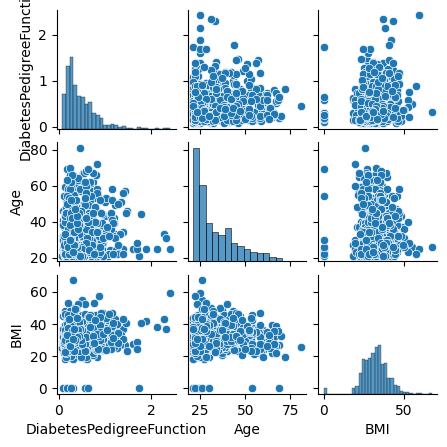

In [56]:
selected_columns_3 = ['DiabetesPedigreeFunction', 'Age', 'BMI']
sns.pairplot(data[selected_columns_3], height=1.5)
plt.show()